第9章 绘图和可视化

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.arange(10)
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

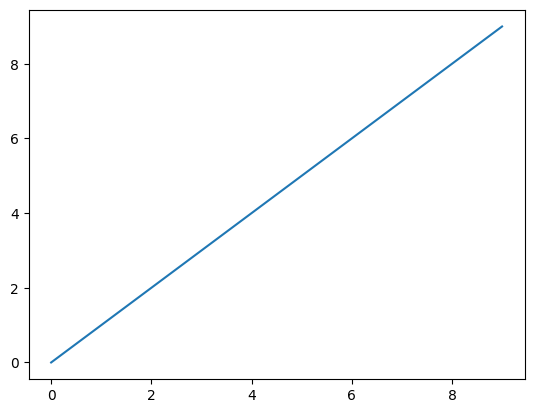

In [3]:
plt.plot(data)
# plt.plot() 是 Matplotlib 中最基础的绘图函数，用于绘制 二维折线图。它将数据点连成线，并可以通过参数自定义图形的样式。


语法:plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)


虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普
通的绘图任务，但如果需要⾃定义⼀些⾼级功能的话就必须学习
matplotlib API。

**Figure和Subplot**

---
 matplotlib的图像都位于Figure对象中。你可以⽤plt.figure创建⼀
个新的Figure：
plt.figure() 是 Matplotlib 中用于创建一个新的 图形（figure）对象 的函数。它提供了一个容器，用于管理和容纳所有的图形元素，例如轴（axes）、标题、标签和图例。

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [7]:
ax1 = fig.add_subplot(2, 2, 1)
# 这条代码的意思是：图像应该是2×2的（即最多4张图），且当前
# 选中的是4个subplot中的第⼀个（编号从1开始）。如果再把后
# ⾯两个subplot也创建出来
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<Axes: >

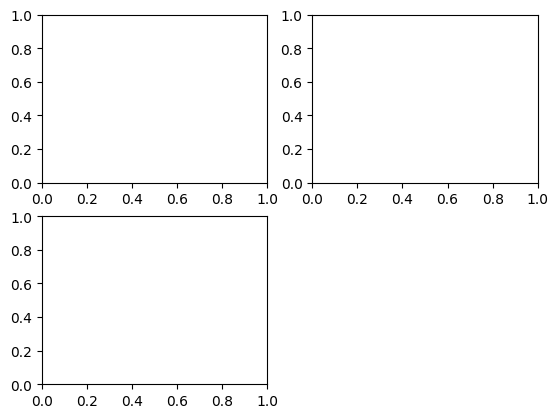

In [8]:
fig= plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

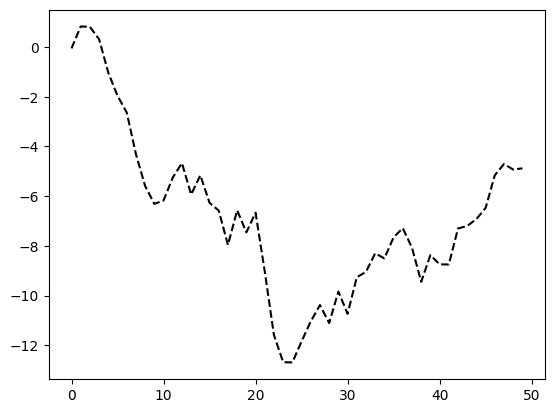

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
# "k--"是⼀个线型选项，⽤于告诉matplotlib绘制⿊⾊虚线图

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
# bins指区间(这里是hist所以是20个柱子),k为黑色的意思,alpha是设置颜色透明度
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


Matplotlib： 在 plt.plot() 等函数后经常使用 _ 来接收无关紧要的返回值，从而忽略返回值的处理。




创建包含subplot⽹格的figure是⼀个⾮常常⻅的任务，matplotlib
有⼀个更为⽅便的⽅法plt.subplots，它可以创建⼀个新的
Figure，并返回⼀个含有已创建的subplot对象的NumPy数组：

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

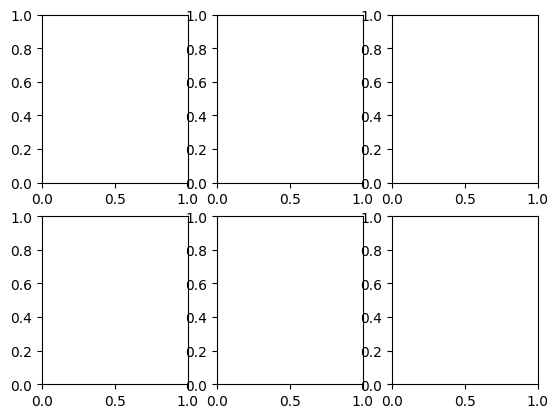

In [12]:
fig, axes = plt.subplots(2, 3)
axes

这是⾮常实⽤的，因为可以轻松地对axes数组进⾏索引，就好像
是⼀个⼆维数组⼀样，例如axes[0,1]。你还可以通过sharex和
sharey指定subplot应该具有相同的X轴或Y轴。在⽐较相同范围
的数据时，这也是⾮常实⽤的，否则，matplotlib会⾃动缩放各
图表的界限。
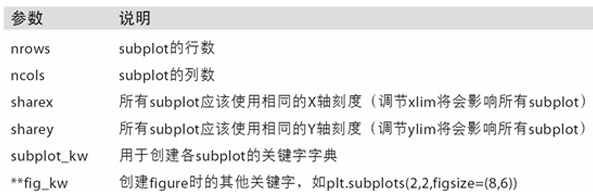

**调整subplot周围的间距**


---
默认情况下，matplotlib会在subplot外围留下⼀定的边距，并在
subplot之间留下⼀定的间距。间距跟图像的⾼度和宽度有关，因
此，如果你调整了图像⼤⼩（不管是编程还是⼿⼯），间距也会
⾃动调整。利⽤Figure的subplots_adjust⽅法可以轻⽽易举地修
改间距，此外，它也是个顶级函数


In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# wspace和hspace⽤于控制宽度和⾼度的百分⽐，可以⽤作subplot之间的间距

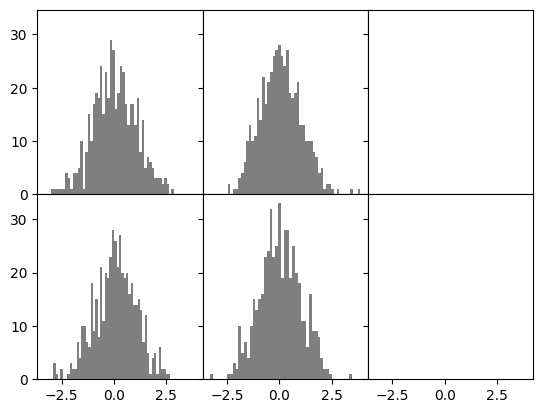

In [13]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否
重叠，所以对于这种情况，你只能⾃⼰设定刻度位置和刻度标
签。后⾯⼏节将会详细介绍该内容。

**颜⾊、标记和线型**

---
matplotlib的plot函数接受⼀组X和Y坐标，还可以接受⼀个表示颜
⾊和线型的字符串缩写。例如，要根据x和y绘制绿⾊虚线，你可
以执⾏如下代码：


In [15]:
ax.plot(x,y,'g--')

NameError: name 'x' is not defined

这种在⼀个字符串中指定颜⾊和线型的⽅式⾮常⽅便。在实际
中，如果你是⽤代码绘图，你可能不想通过处理字符串来获得想
要的格式。通过下⾯这种更为明确的⽅式也能得到同样的效果：

In [ ]:
ax.plot(x,y,linestyle='--',color='g')

常⽤的颜⾊可以使⽤颜⾊缩写，你也可以指定颜⾊码（例
如，'#CECECE'）。你可以通过查看plot的⽂档字符串查看所有
线型的合集

线图可以使⽤标记强调数据点。因为matplotlib可以创建连续线
图，在点之间进⾏插值，因此有时可能不太容易看出真实数据点
的位置。标记也可以放到格式字符串中，但标记类型和线型必须
放在颜⾊后⾯

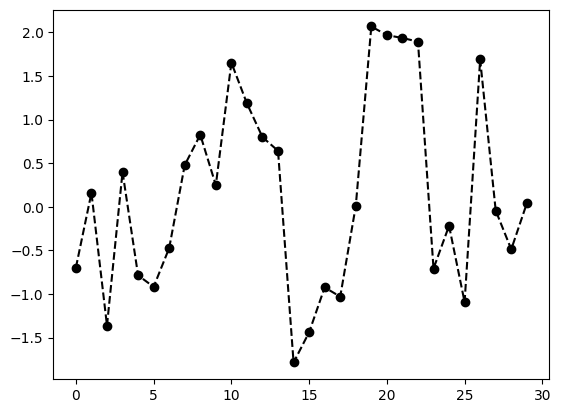

In [16]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')
# plt.plot(randn(30).cumsum(),linestyle='--',color='g')

在线型图中，⾮实际数据点默认是按线性⽅式插值的。可以通过
drawstyle选项修改

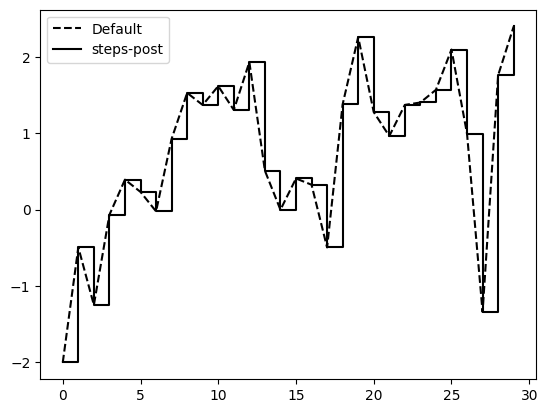

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

**刻度、标签和图例**

---
对于⼤多数的图表装饰项，其主要实现⽅式有⼆：使⽤过程型的
pyplot接⼝（例如，matplotlib.pyplot）以及更为⾯向对象的原⽣
matplotlib API。
pyplot接⼝的设计⽬的就是交互式使⽤，含有诸如xlim、xticks和
xticklabels之类的⽅法。它们分别控制图表的范围、刻度位置、
刻度标签等。其使⽤⽅式有以下两种：
调⽤时不带参数，则返回当前的参数值（例如，plt.xlim()返回
当前的X轴绘图范围）。
调⽤时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴
的范围设置为0到10）。
所有这些⽅法都是对当前或最近创建的AxesSubplot起作⽤的。
它们各⾃对应subplot对象上的两个⽅法，以xlim为例，就是
ax.get_xlim和ax.set_xlim。我更喜欢使⽤subplot的实例⽅法
（因为我喜欢明确的事情，⽽且在处理多个subplot时这样也更清
楚⼀些）。当然你完全可以选择⾃⼰觉得⽅便的那个。


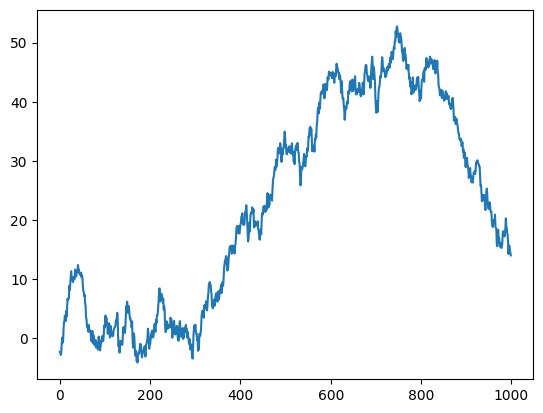

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

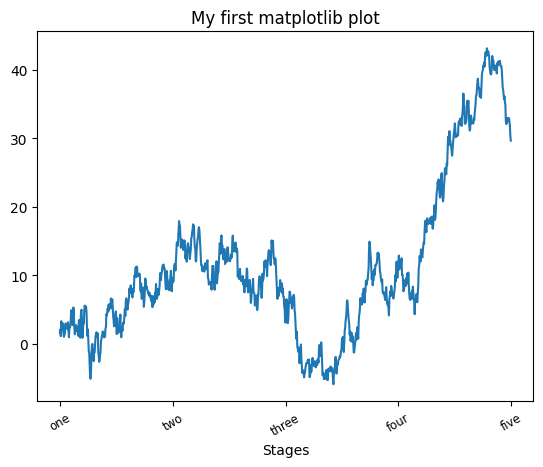

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
plt.show()
# Y轴的修改⽅式与此类似，只需将上述代码中的x替换为y即可。

有集合⽅法，可以批量设定绘图选项。前⾯的例⼦，也可
以写为：

In [ ]:
props	=	{'title':	'My	first	matplotlib	plot','xlabel':	'Stages'}
ax.set(**props)

**添加图例**

---
图例（legend）是另⼀种⽤于标识图表元素的重要⼯具。添加图
例的⽅式有多种。最简单的是在添加subplot的时候传⼊label参
数：


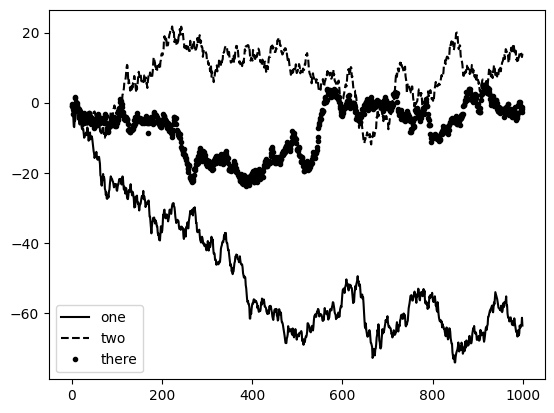

In [28]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='there')
ax.legend(loc='best')
# 添加图例，用于标注每条曲线的名称。
# loc='best'自动选择一个最佳位置放置图例，通常是避免覆盖曲线的位置。P351